In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

About Dataset
Context:
This dataset contains over 7000+ true value cars data across all major tier 1 and tier 2 cities in India which is ready to accept a different owner. The information includes car manufacturer, model, fuel type, year of manufacture to mention a few. 
The aim here is to predict Sell


Content:
id: Unique ID for every car

car_name: Name of a car

yr_mfr: Car manufactured year

fuel_type: Type of fuel car runs on

kms_run: Number of kilometers run

body_type: Car body type. Ex: Sedan, hatchback etc.

transmission: Type of transmission. Ex: Manual, Automatic

variant: Car variant

make: Car manufacturing company

model: Car model name

is_hot: Is it a top selling car? Indicates the demand for a car.

car_availability: Car availability status

total_owners: How many owners have already owned it?

car_rating: How good is the car to buy?

fitness_certificate: Does the car have fitness certificate?

source: Method of selling a car

registered_city: City where the car is registered

registered_state: State where the car is registered

rto: Regional Transport Office where the car is registered

city: City where the car is being sold

times_viewed: Number of times people have shown interest for the car

assured_buy: Broker assured car

broker_quote: Price quoted for previous owner (in INR)

original_price: Original price of a car (in INR)

emi_starts_from: Opting for EMI? Monthly EMI for the car starts from! (in INR)

booking_down_pymnt: Decided to buy? Please pay the down payment (in INR)

ad_created_on: Listed date for selling a car

reserved: Car reserved status

warranty_avail: Warranty availability status

sale_price: Selling price of a car (in INR)

In [2]:
#Reading the csv files containing training data and testing data; and a combined data
d1=pd.read_csv("ML_car price df train.csv")
d2=pd.read_csv("ML_car price df test.csv")
Frames=[d1,d2]
df=pd.concat(Frames)
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [3]:
# Studying about features/columns in dataset and finding out columns having null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7399 entries, 0 to 999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7399 non-null   int64  
 1   car_name             7399 non-null   object 
 2   yr_mfr               7399 non-null   int64  
 3   fuel_type            7399 non-null   object 
 4   kms_run              7399 non-null   int64  
 5   sale_price           7399 non-null   int64  
 6   city                 7399 non-null   object 
 7   times_viewed         7399 non-null   int64  
 8   body_type            7296 non-null   object 
 9   transmission         6843 non-null   object 
 10  variant              7399 non-null   object 
 11  assured_buy          7399 non-null   bool   
 12  registered_city      7389 non-null   object 
 13  registered_state     7389 non-null   object 
 14  is_hot               7399 non-null   bool   
 15  rto                  7399 non-null   ob

In [4]:
df.describe()

,id,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7399.000000,7399.000000,7399.000000,7.399000e+03,7399.000000,7399.000000,7.399000e+03,4.120000e+03,7399.000000,7399.000000
mean,2835.153399,2013.885255,62627.965130,4.548599e+05,1550.293553,1.327342,4.321754e+05,5.510351e+05,10565.262333,68229.139749
std,1953.114416,3.087609,43533.975544,2.827102e+05,2080.790854,0.579824,2.880403e+05,3.119887e+05,6566.651883,42406.574211
min,1.000000,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,9.689900e+04,0.000000,0.000000
25%,925.500000,2012.000000,31881.500000,2.811490e+05,554.500000,1.000000,2.526175e+05,3.414930e+05,6530.500000,42172.500000
50%,2700.000000,2014.000000,55766.000000,3.823990e+05,1088.000000,1.000000,3.610080e+05,4.674800e+05,8882.000000,57360.000000
75%,4549.500000,2016.000000,84187.000000,5.400990e+05,1925.000000,2.000000,5.259500e+05,6.675258e+05,12545.000000,81015.000000
max,6399.000000,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


In [5]:
#

In [6]:
#
#df["original_price"]

In [7]:
#
#
#

In [8]:
#Since "registered_city","registered_state","car_rating","ad_created_on",and "fitness_certificate" have considerably less 
#null values,we handle them by deleting those rows

In [9]:
df.dropna(axis=0,subset=["registered_city","registered_state","car_rating","ad_created_on","fitness_certificate"],inplace=True)
#df["registered_city"].dropna(axis=0,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7380 entries, 0 to 999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7380 non-null   int64  
 1   car_name             7380 non-null   object 
 2   yr_mfr               7380 non-null   int64  
 3   fuel_type            7380 non-null   object 
 4   kms_run              7380 non-null   int64  
 5   sale_price           7380 non-null   int64  
 6   city                 7380 non-null   object 
 7   times_viewed         7380 non-null   int64  
 8   body_type            7286 non-null   object 
 9   transmission         6835 non-null   object 
 10  variant              7380 non-null   object 
 11  assured_buy          7380 non-null   bool   
 12  registered_city      7380 non-null   object 
 13  registered_state     7380 non-null   object 
 14  is_hot               7380 non-null   bool   
 15  rto                  7380 non-null   ob

In [11]:
df.describe()

,id,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7380.000000,7380.000000,7380.000000,7.380000e+03,7380.000000,7380.000000,7.380000e+03,4.120000e+03,7380.000000,7380.000000
mean,2834.521951,2013.892954,62605.662737,4.554196e+05,1553.462331,1.326152,4.330034e+05,5.510351e+05,10578.261924,68313.090379
std,1952.661154,3.079632,43517.311883,2.824484e+05,2082.453189,0.578790,2.876795e+05,3.119887e+05,6560.569522,42367.295512
min,1.000000,1996.000000,60.000000,2.000000e+04,3.000000,1.000000,0.000000e+00,9.689900e+04,465.000000,3000.000000
25%,925.750000,2012.000000,31820.750000,2.817990e+05,556.000000,1.000000,2.531628e+05,3.414930e+05,6545.000000,42270.000000
50%,2701.500000,2014.000000,55758.000000,3.827990e+05,1090.000000,1.000000,3.616045e+05,4.674800e+05,8891.000000,57420.000000
75%,4548.250000,2016.000000,84158.500000,5.403990e+05,1930.000000,2.000000,5.264288e+05,6.675258e+05,12552.000000,81060.000000
max,6399.000000,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


<AxesSubplot:xlabel='original_price'>

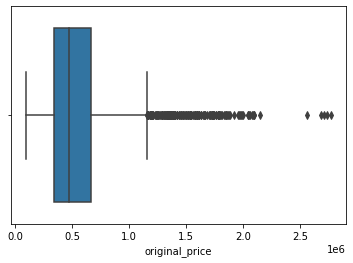

In [12]:
sns.boxplot(data=df,x=df["original_price"])

In [13]:
#Counting no.of data points, whose "original_prie" is greater than max value as per box plot
df.loc[df["original_price"]>(6.663375e+05+(1.5*(6.663375e+05-3.424855e+05)))]["original_price"].count()

193

In [14]:
#Replacing the null values of "original_price"with its median
df["original_price"].median()
df["original_price"].fillna(df["original_price"].median(),inplace=True)
df["original_price"].info()

<class 'pandas.core.series.Series'>
Int64Index: 7380 entries, 0 to 999
Series name: original_price
Non-Null Count  Dtype  
--------------  -----  
7380 non-null   float64
dtypes: float64(1)
memory usage: 115.3 KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7380 entries, 0 to 999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7380 non-null   int64  
 1   car_name             7380 non-null   object 
 2   yr_mfr               7380 non-null   int64  
 3   fuel_type            7380 non-null   object 
 4   kms_run              7380 non-null   int64  
 5   sale_price           7380 non-null   int64  
 6   city                 7380 non-null   object 
 7   times_viewed         7380 non-null   int64  
 8   body_type            7286 non-null   object 
 9   transmission         6835 non-null   object 
 10  variant              7380 non-null   object 
 11  assured_buy          7380 non-null   bool   
 12  registered_city      7380 non-null   object 
 13  registered_state     7380 non-null   object 
 14  is_hot               7380 non-null   bool   
 15  rto                  7380 non-null   ob

In [16]:
df["transmission"].value_counts()

manual       6206
automatic     629
Name: transmission, dtype: int64

In [17]:
#The data type of "transmission","car_availability","source","body_type" is object, so therre null values are replaced by 
#their respective mode

In [18]:
transmission_mode=df["transmission"].mode()
print(transmission_mode)

0    manual
Name: transmission, dtype: object


In [19]:
df["transmission"].fillna("manual",inplace=True)
df["transmission"].info()
df["transmission"].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 7380 entries, 0 to 999
Series name: transmission
Non-Null Count  Dtype 
--------------  ----- 
7380 non-null   object
dtypes: object(1)
memory usage: 115.3+ KB


manual       6751
automatic     629
Name: transmission, dtype: int64

In [20]:
df["car_availability"].value_counts()

in_stock          6484
in_transit         225
pickup_pending      45
out_of_stock        25
Name: car_availability, dtype: int64

In [21]:
car_availability_mode=df["car_availability"].mode()
print(car_availability_mode)

0    in_stock
Name: car_availability, dtype: object


In [22]:
df["car_availability"].fillna("in_stock",inplace=True)
df["car_availability"].info()
df["car_availability"].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 7380 entries, 0 to 999
Series name: car_availability
Non-Null Count  Dtype 
--------------  ----- 
7380 non-null   object
dtypes: object(1)
memory usage: 115.3+ KB


in_stock          7085
in_transit         225
pickup_pending      45
out_of_stock        25
Name: car_availability, dtype: int64

In [23]:
df["source"].value_counts()

inperson_sale           6820
online                   391
customer_to_customer      43
Name: source, dtype: int64

In [24]:
source_mode=df["source"].mode()
print(source_mode)

0    inperson_sale
Name: source, dtype: object


In [25]:
df["source"].fillna("inperson_sale",inplace=True)
df["source"].info()
df["source"].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 7380 entries, 0 to 999
Series name: source
Non-Null Count  Dtype 
--------------  ----- 
7380 non-null   object
dtypes: object(1)
memory usage: 115.3+ KB


inperson_sale           6946
online                   391
customer_to_customer      43
Name: source, dtype: int64

In [26]:
df["body_type"].value_counts()

hatchback       4353
sedan           1478
suv             1103
luxury suv       189
luxury sedan     163
Name: body_type, dtype: int64

In [27]:
body_type_mode=df["body_type"].mode()
print(body_type_mode)

0    hatchback
Name: body_type, dtype: object


In [28]:
df["body_type"].fillna("hatchback",inplace=True)
df["body_type"].info()
df["body_type"].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 7380 entries, 0 to 999
Series name: body_type
Non-Null Count  Dtype 
--------------  ----- 
7380 non-null   object
dtypes: object(1)
memory usage: 115.3+ KB


hatchback       4447
sedan           1478
suv             1103
luxury suv       189
luxury sedan     163
Name: body_type, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7380 entries, 0 to 999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7380 non-null   int64  
 1   car_name             7380 non-null   object 
 2   yr_mfr               7380 non-null   int64  
 3   fuel_type            7380 non-null   object 
 4   kms_run              7380 non-null   int64  
 5   sale_price           7380 non-null   int64  
 6   city                 7380 non-null   object 
 7   times_viewed         7380 non-null   int64  
 8   body_type            7380 non-null   object 
 9   transmission         7380 non-null   object 
 10  variant              7380 non-null   object 
 11  assured_buy          7380 non-null   bool   
 12  registered_city      7380 non-null   object 
 13  registered_state     7380 non-null   object 
 14  is_hot               7380 non-null   bool   
 15  rto                  7380 non-null   ob

In [30]:
# Thus all null values have handled

In [31]:
# Lets wheather there are any duplicate rows
df.duplicated().sum()

0

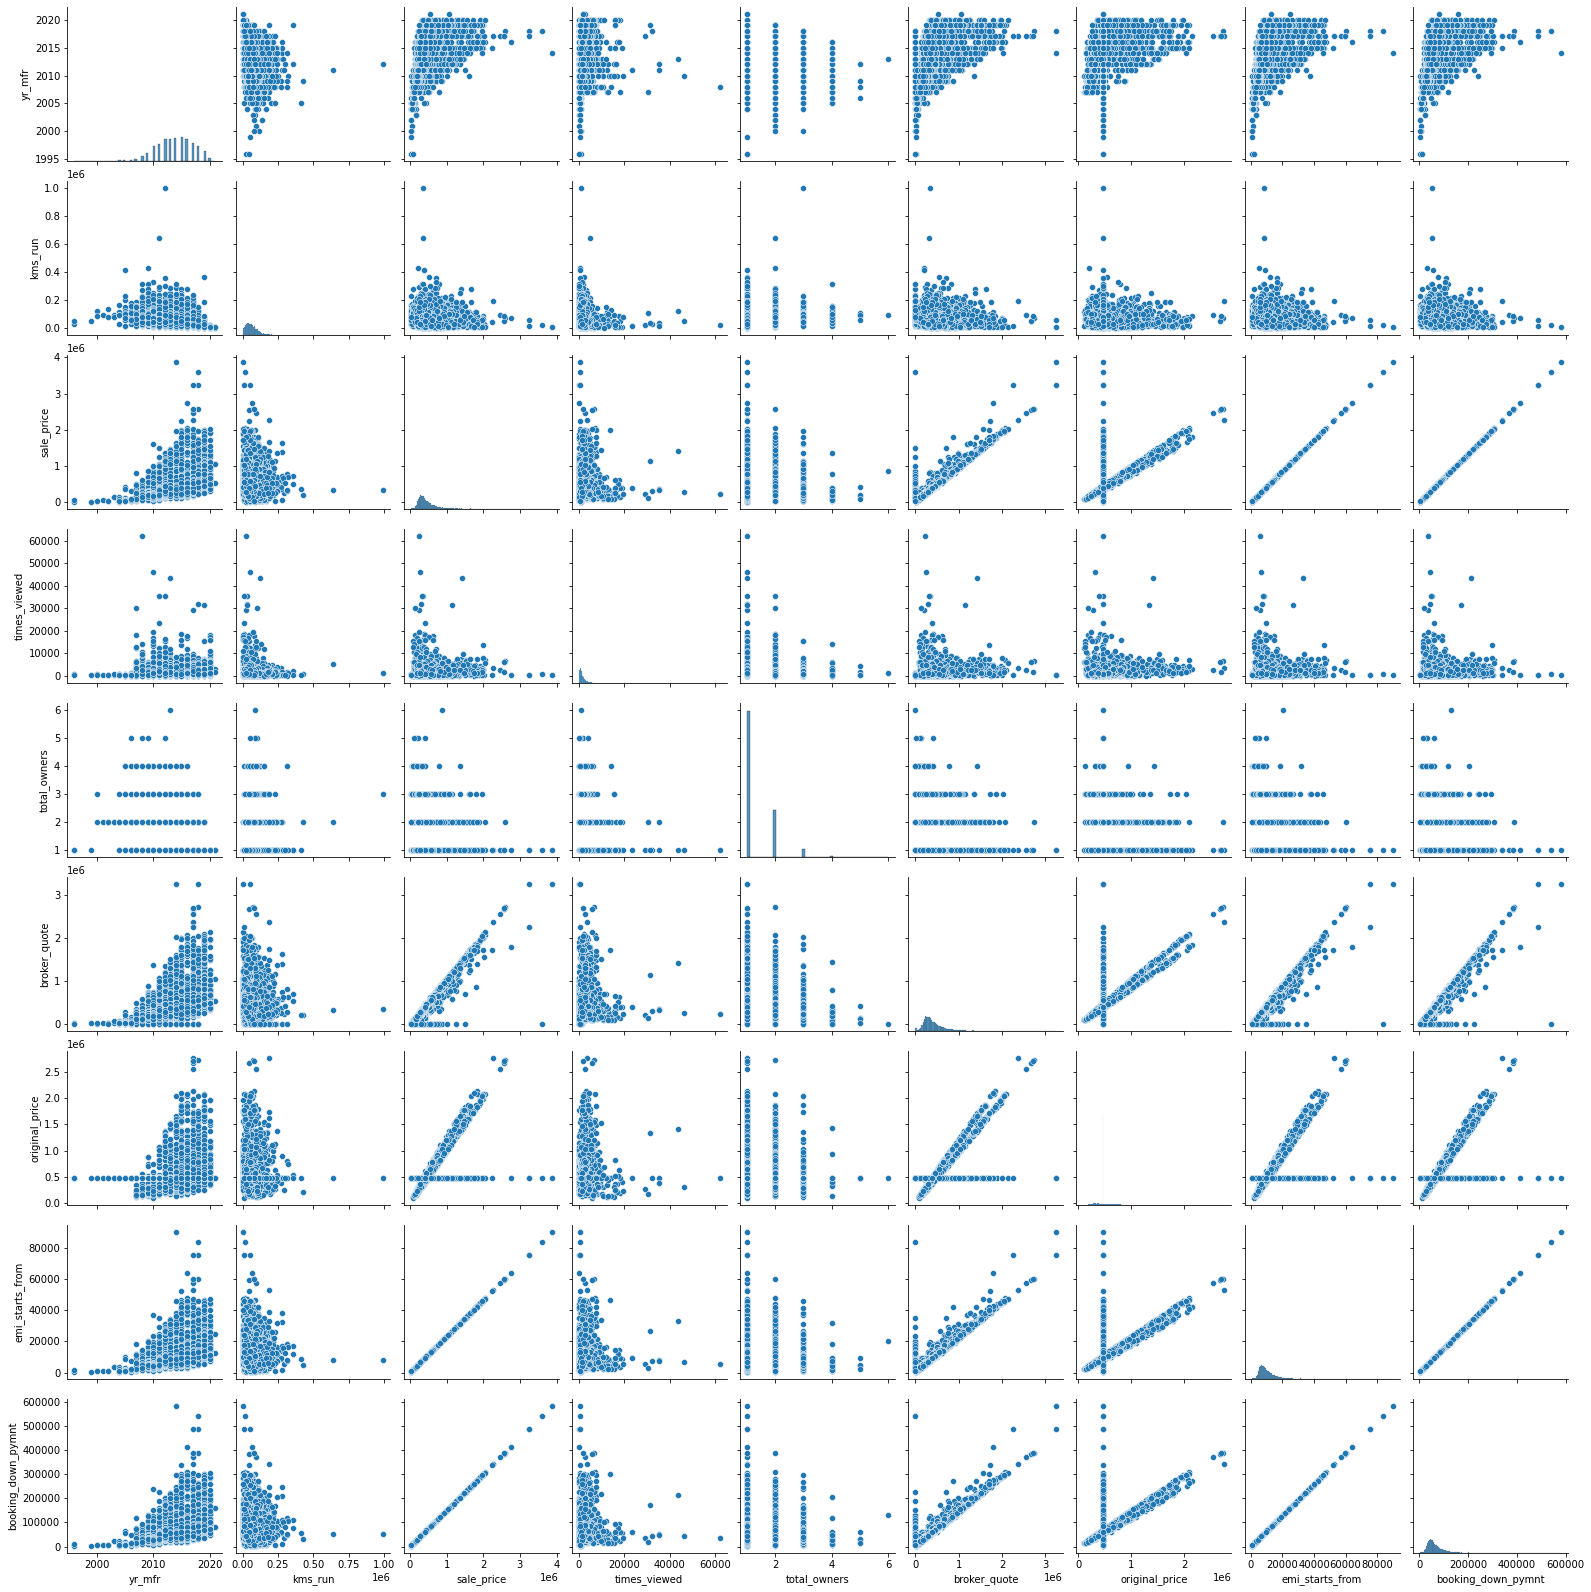

In [32]:
#Let try to get correlation between the features of numeric data type of dataset 
df = df.reset_index()
df_1=df[["yr_mfr","kms_run","sale_price","times_viewed","total_owners","broker_quote","original_price","car_rating","emi_starts_from","booking_down_pymnt"]]
sns.pairplot(data=df_1)
plt.show()

In [33]:
df_1.corr()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
yr_mfr,1.000000,-0.397391,0.517900,0.058550,-0.299278,0.542331,0.398819,0.517899,0.517899
kms_run,-0.397391,1.000000,-0.103942,-0.114651,0.132145,-0.125584,-0.076019,-0.103942,-0.103942
sale_price,0.517900,-0.103942,1.000000,0.090688,-0.129194,0.964356,0.775883,1.000000,1.000000
times_viewed,0.058550,-0.114651,0.090688,1.000000,-0.000103,0.122390,0.107113,0.090688,0.090688
total_owners,-0.299278,0.132145,-0.129194,-0.000103,1.000000,-0.150536,-0.074495,-0.129193,-0.129194
broker_quote,0.542331,-0.125584,0.964356,0.122390,-0.150536,1.000000,0.811348,0.964356,0.964356
original_price,0.398819,-0.076019,0.775883,0.107113,-0.074495,0.811348,1.000000,0.775883,0.775883
emi_starts_from,0.517899,-0.103942,1.000000,0.090688,-0.129193,0.964356,0.775883,1.000000,1.000000
booking_down_pymnt,0.517899,-0.103942,1.000000,0.090688,-0.129194,0.964356,0.775883,1.000000,1.000000


In [34]:
for i in ["yr_mfr","kms_run","sale_price","times_viewed","total_owners","broker_quote","original_price"]:
    print(df_1[i].skew())

-0.28947922032263657
2.9068184086364357
2.7799236720167335
10.211084310676503
1.8598604286282312
2.3662050139791764
3.0347108783089


In [35]:
#By seeing correaltions, we can conclude that the"sale_price"(target variable) is in positive correaltion with 
#"emi_starts_from"and"booking_down_pymnt"

In [36]:
from scipy import stats
#df_1(np.abs(stats.zscore(df_1["sale_price"])) < 3)

#Getting z score for values in "broker_quote"
z1 = np.abs(stats.zscore(df_1['broker_quote']))
print(z1)
#Getting index of data points whose z score for "broker_quote" is greater than 3
olk=np.where(z1 > 3)
print(olk)


0       0.122806
1       0.556450
2       0.127239
3       0.482310
4       0.251295
          ...   
7375    1.505261
7376    0.687640
7377    0.404772
7378    0.172372
7379    0.509241
Name: broker_quote, Length: 7380, dtype: float64
(array([ 126,  207,  216,  255,  258,  344,  396,  497,  558, 1172, 1188,
       1190, 1207, 1244, 1381, 1428, 1429, 1531, 1533, 1562, 1567, 1577,
       1584, 1586, 1625, 1634, 1735, 1826, 1889, 1916, 1933, 2030, 2098,
       2099, 2156, 2180, 2200, 2339, 2365, 2373, 2380, 2390, 2410, 2432,
       2434, 2436, 2476, 2489, 2493, 2826, 2843, 2847, 2852, 2878, 3004,
       3005, 3204, 3241, 3327, 3335, 3341, 3345, 3353, 3378, 3385, 3390,
       3492, 3573, 3584, 3586, 3668, 3675, 3683, 3712, 3721, 3723, 3727,
       3738, 3746, 3904, 3947, 3948, 3960, 3962, 3973, 4027, 4029, 4037,
       4038, 4083, 4139, 4143, 4151, 4177, 4240, 4306, 4325, 4338, 4341,
       4405, 4554, 4564, 4571, 4758, 4805, 4830, 4926, 4979, 4989, 5016,
       5165, 5196, 5246, 5460, 54

In [37]:
# remove_outliers functions helps to remove outlier based on the z score, if z score value of a point is greater than 3,then
# it is an outlier
def remove_outliers (df,var):
    z=np.abs(stats.zscore(df[str(var)]))
    outlier_index=np.where(z>3)
    df.drop(df.index[outlier_index],inplace=True)
    return df
def outliers_count(df,var):
    z=np.abs(stats.zscore(df[str(var)]))
    outlier_index=np.where(z>3)
    print(outlier_index)

In [38]:
#for j in ["yr_mfr","kms_run","sale_price","times_viewed","total_owners","broker_quote","original_price"]:
    #remove_outliers(df_1,i)
    #print("ok")
    
    


In [39]:
#df_1.info()

In [40]:
# Getting a rough idea of how many outliers are present w.r.t these columns
#"yr_mfr","kms_run","sale_price","times_viewed","total_owners","broker_quote","original_price"

In [41]:
for j in ["yr_mfr","kms_run","sale_price","times_viewed","total_owners","broker_quote","original_price"]:
    outliers_count(df_1,i)
    print("ok")

(array([  62,  126,  130,  155,  156,  207,  216,  226,  255,  258,  344,
        347,  396,  434,  455,  497,  524,  558, 1140, 1172, 1188, 1190,
       1207, 1244, 1381, 1429, 1531, 1533, 1562, 1567, 1577, 1584, 1586,
       1625, 1735, 1826, 1889, 1916, 1933, 1935, 2030, 2093, 2098, 2099,
       2109, 2156, 2180, 2200, 2339, 2365, 2373, 2379, 2380, 2390, 2410,
       2434, 2436, 2445, 2493, 2826, 2843, 2847, 2852, 2878, 3004, 3005,
       3241, 3268, 3327, 3335, 3341, 3345, 3353, 3385, 3390, 3492, 3573,
       3586, 3648, 3668, 3712, 3721, 3723, 3727, 3738, 3904, 3947, 3960,
       3962, 3973, 4029, 4038, 4083, 4139, 4143, 4151, 4240, 4306, 4338,
       4554, 4564, 4702, 4758, 4805, 4830, 4926, 4929, 4979, 5165, 5196,
       5245, 5246, 5274, 5296, 5308, 5459, 5460, 5476, 5480, 5486, 5490,
       5611, 5701, 5704, 5804, 5843, 5871, 5878, 5899, 6040, 6054, 6144,
       6152, 6180, 6210, 6212, 6217, 6232, 6337, 6352, 6404, 6415, 6445,
       6451, 6457, 6466, 6471, 6524, 6570, 6687, 6

In [42]:
# Since we are getting outliers at same index w.r.t specified columns, we will target outliers of "sale_price"

In [43]:
#removing outliers
remove_outliers (df,"sale_price")

,index,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,...,1,469605,467480.0,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,995,996,maruti 800,2002,petrol & lpg,77323,35000,ahmedabad,492,hatchback,...,2,0,467480.0,overpriced,2019-12-31T16:07:01.563,False,813,5250,False,False
7376,996,997,honda amaze,2018,diesel,53486,604299,ghaziabad,2756,sedan,...,1,630810,787750.0,great,2021-02-07T08:05:30.443,True,14036,90645,True,False
7377,997,998,maruti ignis,2018,petrol,8854,562599,chennai,640,hatchback,...,1,549440,467480.0,great,2021-03-31T10:21:56.289,True,13068,84390,False,False
7378,998,999,honda amaze,2015,petrol,46300,400499,pune,795,sedan,...,1,383419,467480.0,great,2021-03-04T12:40:38.652,True,9303,60075,True,False


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7222 entries, 0 to 7379
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                7222 non-null   int64  
 1   id                   7222 non-null   int64  
 2   car_name             7222 non-null   object 
 3   yr_mfr               7222 non-null   int64  
 4   fuel_type            7222 non-null   object 
 5   kms_run              7222 non-null   int64  
 6   sale_price           7222 non-null   int64  
 7   city                 7222 non-null   object 
 8   times_viewed         7222 non-null   int64  
 9   body_type            7222 non-null   object 
 10  transmission         7222 non-null   object 
 11  variant              7222 non-null   object 
 12  assured_buy          7222 non-null   bool   
 13  registered_city      7222 non-null   object 
 14  registered_state     7222 non-null   object 
 15  is_hot               7222 non-null   b

In [45]:
#After removing outliers and handling nul values, we 7220 data points 
df.describe()

,index,id,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7222.000000,7222.000000,7222.000000,7222.000000,7.222000e+03,7222.000000,7222.000000,7.222000e+03,7.222000e+03,7222.000000,7222.000000
mean,2830.597203,2831.597203,2013.831764,62719.387843,4.289612e+05,1520.781363,1.326779,4.072940e+05,4.956781e+05,9963.698421,64344.320825
std,1955.065912,1955.065912,3.069219,43400.352681,2.125842e+05,2016.243733,0.579242,2.240364e+05,1.823930e+05,4937.797442,31887.656758
min,0.000000,1.000000,1996.000000,60.000000,2.000000e+04,3.000000,1.000000,0.000000e+00,9.689900e+04,465.000000,3000.000000
25%,921.000000,922.000000,2012.000000,32039.000000,2.795240e+05,553.000000,1.000000,2.510722e+05,4.337160e+05,6492.500000,41928.750000
50%,2694.500000,2695.500000,2014.000000,55918.000000,3.787490e+05,1072.000000,1.000000,3.573450e+05,4.674800e+05,8797.500000,56812.500000
75%,4551.750000,4552.750000,2016.000000,84283.250000,5.275490e+05,1884.750000,2.000000,5.116005e+05,4.893178e+05,12253.750000,79132.500000
max,6398.000000,6399.000000,2021.000000,996609.000000,1.301484e+06,61930.000000,6.000000,1.368088e+06,1.602788e+06,30230.000000,195223.000000


In [46]:
#"emi_starts_from","booking_down_pymnt": These features are linearly correlated with target variable
#"times_viewed","rto","ad_created_on": Does not seems to give much information for prediction of selling price

In [47]:
df.drop(df[["times_viewed","rto","ad_created_on","emi_starts_from","booking_down_pymnt"]],axis=1,inplace=True)
df

,index,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,body_type,transmission,...,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,fitness_certificate,reserved,warranty_avail
0,0,1,maruti swift,2015,petrol,8063,386399,noida,hatchback,manual,...,maruti,swift,in_stock,2,397677,404177.0,great,True,False,False
1,1,2,maruti alto 800,2016,petrol,23104,265499,noida,hatchback,manual,...,maruti,alto 800,in_stock,1,272935,354313.0,great,True,False,False
2,2,3,hyundai grand i10,2017,petrol,23402,477699,noida,hatchback,manual,...,hyundai,grand i10,in_stock,1,469605,467480.0,great,True,False,False
3,3,4,maruti swift,2013,diesel,39124,307999,noida,hatchback,manual,...,maruti,swift,in_stock,1,294262,374326.0,great,True,False,False
4,4,5,hyundai grand i10,2015,petrol,22116,361499,noida,hatchback,manual,...,hyundai,grand i10,in_stock,1,360716,367216.0,great,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,995,996,maruti 800,2002,petrol & lpg,77323,35000,ahmedabad,hatchback,manual,...,maruti,800,in_stock,2,0,467480.0,overpriced,False,False,False
7376,996,997,honda amaze,2018,diesel,53486,604299,ghaziabad,sedan,manual,...,honda,amaze,in_stock,1,630810,787750.0,great,True,True,False
7377,997,998,maruti ignis,2018,petrol,8854,562599,chennai,hatchback,manual,...,maruti,ignis,in_stock,1,549440,467480.0,great,True,False,False
7378,998,999,honda amaze,2015,petrol,46300,400499,pune,sedan,manual,...,honda,amaze,in_stock,1,383419,467480.0,great,True,True,False


In [48]:
#"index","id":Does not seems to give much information for prediction of selling price
df.drop(df[["index","id"]],axis=1,inplace=True)
df

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,fitness_certificate,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,hatchback,manual,lxi opt,True,...,maruti,swift,in_stock,2,397677,404177.0,great,True,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,hatchback,manual,lxi,True,...,maruti,alto 800,in_stock,1,272935,354313.0,great,True,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,hatchback,manual,sports 1.2 vtvt,True,...,hyundai,grand i10,in_stock,1,469605,467480.0,great,True,False,False
3,maruti swift,2013,diesel,39124,307999,noida,hatchback,manual,vdi,True,...,maruti,swift,in_stock,1,294262,374326.0,great,True,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,hatchback,manual,magna 1.2 vtvt,False,...,hyundai,grand i10,in_stock,1,360716,367216.0,great,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,maruti 800,2002,petrol & lpg,77323,35000,ahmedabad,hatchback,manual,ac,False,...,maruti,800,in_stock,2,0,467480.0,overpriced,False,False,False
7376,honda amaze,2018,diesel,53486,604299,ghaziabad,sedan,manual,1.5 v cvt i-dtec,True,...,honda,amaze,in_stock,1,630810,787750.0,great,True,True,False
7377,maruti ignis,2018,petrol,8854,562599,chennai,hatchback,manual,delta 1.2 k12,True,...,maruti,ignis,in_stock,1,549440,467480.0,great,True,False,False
7378,honda amaze,2015,petrol,46300,400499,pune,sedan,manual,1.2 smt i vtec,True,...,honda,amaze,in_stock,1,383419,467480.0,great,True,True,False


In [49]:
df[["car_name","make","model"]]

,car_name,make,model
0,maruti swift,maruti,swift
1,maruti alto 800,maruti,alto 800
2,hyundai grand i10,hyundai,grand i10
3,maruti swift,maruti,swift
4,hyundai grand i10,hyundai,grand i10
...,...,...,...
7375,maruti 800,maruti,800
7376,honda amaze,honda,amaze
7377,maruti ignis,maruti,ignis
7378,honda amaze,honda,amaze


In [50]:
#"make"and "model"seperately gives same information that "car_name" gives, we can drop "make" and "model"
df.drop(df[["make","model"]],axis=1,inplace=True)

In [51]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,body_type,transmission,variant,assured_buy,...,is_hot,source,car_availability,total_owners,broker_quote,original_price,car_rating,fitness_certificate,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,hatchback,manual,lxi opt,True,...,True,inperson_sale,in_stock,2,397677,404177.0,great,True,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,hatchback,manual,lxi,True,...,True,inperson_sale,in_stock,1,272935,354313.0,great,True,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,hatchback,manual,sports 1.2 vtvt,True,...,True,inperson_sale,in_stock,1,469605,467480.0,great,True,False,False
3,maruti swift,2013,diesel,39124,307999,noida,hatchback,manual,vdi,True,...,True,inperson_sale,in_stock,1,294262,374326.0,great,True,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,hatchback,manual,magna 1.2 vtvt,False,...,True,inperson_sale,in_stock,1,360716,367216.0,great,True,False,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7222 entries, 0 to 7379
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7222 non-null   object 
 1   yr_mfr               7222 non-null   int64  
 2   fuel_type            7222 non-null   object 
 3   kms_run              7222 non-null   int64  
 4   sale_price           7222 non-null   int64  
 5   city                 7222 non-null   object 
 6   body_type            7222 non-null   object 
 7   transmission         7222 non-null   object 
 8   variant              7222 non-null   object 
 9   assured_buy          7222 non-null   bool   
 10  registered_city      7222 non-null   object 
 11  registered_state     7222 non-null   object 
 12  is_hot               7222 non-null   bool   
 13  source               7222 non-null   object 
 14  car_availability     7222 non-null   object 
 15  total_owners         7222 non-null   i

### Encoding of object features within the dataset

In [53]:
df_3=df[["car_name","fuel_type","city","body_type","transmission","variant","assured_buy","registered_city","registered_state","is_hot","source","car_availability","car_rating","fitness_certificate","reserved","warranty_avail"]]
df_encode=pd.get_dummies(df_3)

In [54]:
df_4=df[["yr_mfr","kms_run",'sale_price',"total_owners","broker_quote","original_price"]]
frame1=[df_4,df_encode]
df_combine=pd.concat(frame1,axis=1)

In [55]:
X=df_combine.drop("sale_price",axis=1)
Y=df_combine["sale_price"]

### Splitting the dataset to perform training of model on training data and testing of model on testing data

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=124)
print("ok")

ok


   ### Fitting Decision tree Regressor model on traing data and evaluating its performance at different max_depth of tree  with helps function (apply_dt)

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
#print(mean_squared_error(Y_test, Y_predicted))
#print(math.sqrt(mean_squared_error(Y_test, Y_predicted)))
def apply_dt(x_train,x_test,y_train,y_test,i):
    dt1=DecisionTreeRegressor(max_depth=i,random_state=123)
    dt=dt1.fit(x_train,y_train)
    y_pred_test=dt.predict(x_test)
    mse=mean_squared_error(y_test,y_pred_test)
    rmse=math.sqrt(mse)
    r2_s=r2_score(y_test,y_pred_test)
    #Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

# here
# n = number of observation, p = number of features
    Adj_r2 = 1-(1-r2_s)*(x_test.shape[0]-1)/(x_test.shape[0]-X_test.shape[1]-1)
    performance_result_test=[r2_s,Adj_r2,mse,rmse]
    
    y_pred_train=dt.predict(x_train)
    mse_1=mean_squared_error(y_train,y_pred_train)
    rmse_1=math.sqrt(mse_1)
    r2_s_1=r2_score(y_train,y_pred_train)
    Adj_r2_1 = 1-(1-r2_s)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
    performance_result_train=[r2_s_1,Adj_r2_1,mse_1,rmse_1]
    
    performance_result=[performance_result_test,performance_result_train]
    return performance_result

In [58]:
#apply_dt(X_train,X_test,y_train,y_test,5)

In [59]:
#X_test.shape[0]
#X_test.shape[1]

In [60]:
for i in range(5,50,5):
    print("Max_depth= ",i)
    performance_result=apply_dt(X_train,X_test,y_train,y_test,i)
    print("Test data result")
    print(performance_result[0])
    print("Train data result")
    print(performance_result[1])

Max_depth=  5
Test data result
[0.9556108689784105, 0.883175142414626, 2055264869.8709757, 45335.029170289235]
Train data result
[0.9629259280848113, 0.9395465728420606, 1657139495.996161, 40707.978284313765]
Max_depth=  10
Test data result
[0.9627021207667906, 0.9018381452987466, 1726932227.427968, 41556.374089036784]
Train data result
[0.9926597675880148, 0.9492041278241337, 328094228.96729416, 18113.371551627108]
Max_depth=  15
Test data result
[0.9572938109959084, 0.8876043677000456, 1977342830.6918154, 44467.32317884466]
Train data result
[0.99831814789494, 0.9418385666325305, 75175544.67971334, 8670.383191054092]
Max_depth=  20
Test data result
[0.9563391799299019, 0.8850919364862303, 2021543283.5616016, 44961.575634775094]
Train data result
[0.9996898437440119, 0.9405384573876918, 13863386.32842831, 3723.3568628897647]
Max_depth=  25
Test data result
[0.9576021782674186, 0.8884159394012499, 1963065091.8497436, 44306.490403210046]
Train data result
[0.9999503380775813, 0.94225853

Considering the results of test data and training data from Decision Tree regressor model, at max_depth=10 the adjusted R_score and Root mean squared error is optimal i.e
for testing data
### adjusted R_scocre =0.9018381452987466
### Root mean squared error=41556.374089036784

for training data
### adjusted R_scocre =0.9492041278241337
### Root mean squared error=18113.371551627108



In [80]:
DecisionT1=DecisionTreeRegressor(max_depth=10,random_state=123)
DecisionT1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)


### This seems that the model is getting bit overfit and we can do improvements in this model by doing some feature engineering, so as to get better results

In [61]:
#dt1=DecisionTreeRegressor(max_depth=10,random_state=123)
#dt=dt1.fit(X_train,y_train)
#y_pred=dt.predict(X_train)
#mse=mean_squared_error(y_train,y_pred)
#rmse=math.sqrt(mse)
#r2_s=r2_score(y_train,y_pred)
#Adj_r2 = 1-(1-r2_s)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
#performance_result_train=[r2_s,Adj_r2,mse,rmse]
#print(performance_result_train)

### There are too many features form due to encoding of some features , so lets analysis the features again

In [62]:
for i in df.columns:
    print(i)
    a1=df[i].value_counts()
    print(a1)

car_name
maruti swift             534
hyundai i10              386
maruti swift dzire       375
maruti wagon r 1.0       344
hyundai grand i10        274
                        ... 
mitsubishi outlander       1
tata harrier               1
renault captur             1
volkswagen cross polo      1
maruti 800                 1
Name: car_name, Length: 173, dtype: int64
yr_mfr
2015    824
2014    810
2012    793
2013    785
2016    763
2017    620
2011    610
2010    530
2018    518
2019    335
2009    268
2008    170
2020     77
2007     62
2005     21
2006     17
2004      7
2021      2
2002      2
2003      2
2000      2
1996      2
1999      1
2001      1
Name: yr_mfr, dtype: int64
fuel_type
petrol          4616
diesel          2136
petrol & cng     424
petrol & lpg      41
electric           5
Name: fuel_type, dtype: int64
kms_run
62730    3
53953    3
49994    3
19487    3
64886    3
        ..
84063    1
43470    1
21788    1
60198    1
27245    1
Name: kms_run, Length: 7006, dtype

### The features like "car_name","variant","yr_mfr"(manufacturing year of car) gives specific information about car.Also these features have too many unique value, Lets try to combine these three features to a single feature  and check the performance

In [63]:
import warnings
warnings.filterwarnings('ignore')
df_3["car_details1"]=df_3["car_name"]+"_"+df_3["variant"]


In [64]:
df_3["car_details"]=df_3["car_details1"]+"_"+df_4["yr_mfr"].astype("str")
df_3["car_details"]

0                    maruti swift_lxi opt_2015
1                     maruti alto 800_lxi_2016
2       hyundai grand i10_sports 1.2 vtvt_2017
3                        maruti swift_vdi_2013
4        hyundai grand i10_magna 1.2 vtvt_2015
                         ...                  
7375                        maruti 800_ac_2002
7376         honda amaze_1.5 v cvt i-dtec_2018
7377           maruti ignis_delta 1.2 k12_2018
7378           honda amaze_1.2 smt i vtec_2015
7379                  maruti alto k10_lxi_2016
Name: car_details, Length: 7222, dtype: object

In [65]:
df_3.columns

Index(['car_name', 'fuel_type', 'city', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot',
       'source', 'car_availability', 'car_rating', 'fitness_certificate',
       'reserved', 'warranty_avail', 'car_details1', 'car_details'],
      dtype='object')

In [66]:
df_3.drop(df_3[['car_name','variant',"car_details1"]],axis=1,inplace=True)
for i in df_3.columns:
    print(i)
    a2=df_3[i].value_counts()
    print(a2)

fuel_type
petrol          4616
diesel          2136
petrol & cng     424
petrol & lpg      41
electric           5
Name: fuel_type, dtype: int64
city
mumbai       1297
bengaluru    1230
new delhi    1122
pune          750
chennai       689
hyderabad     622
ahmedabad     408
gurgaon       339
noida         305
ghaziabad     224
faridabad     115
lucknow        99
kolkata        22
Name: city, dtype: int64
body_type
hatchback       4429
sedan           1474
suv             1061
luxury suv       132
luxury sedan     126
Name: body_type, dtype: int64
transmission
manual       6659
automatic     563
Name: transmission, dtype: int64
assured_buy
True     6009
False    1213
Name: assured_buy, dtype: int64
registered_city
delhi         947
bengaluru     652
chennai       588
hyderabad     584
pune          565
             ... 
khopoli         1
karad           1
sindhudurg      1
osmanabad       1
mangaon         1
Name: registered_city, Length: 241, dtype: int64
registered_state
maharashtra 

In [67]:
df_encode1=pd.get_dummies(df_3)
df_4_1=df[["kms_run",'sale_price',"total_owners","broker_quote","original_price"]]
frame2=[df_4_1,df_encode1]
df_combine1=pd.concat(frame2,axis=1)

In [68]:
X1=df_combine1.drop("sale_price",axis=1)
Y1=df_combine1["sale_price"]

In [69]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=124)
print("ok")

ok


In [70]:
for i in range(5,50,5):
    print("Max_depth= ",i)
    performance_result=apply_dt(X1_train,X1_test,y1_train,y1_test,i)
    print("Test data result")
    print(performance_result[0])
    print("Train data result")
    print(performance_result[1])

Max_depth=  5
Test data result
[0.9551264397217594, 0.8819002046626133, 2077694469.4197628, 45581.73394485737]
Train data result
[0.9628560691746123, 0.9109925535140392, 1660262054.5190756, 40746.31338561902]
Max_depth=  10
Test data result
[0.9663084251476171, 0.9113293424905693, 1559956426.5191932, 39496.283705168935]
Train data result
[0.9919835960494737, 0.933172205924669, 358317792.35542655, 18929.28398950754]
Max_depth=  15
Test data result
[0.9689572847403332, 0.9183007032169643, 1437311356.8627896, 37911.88938661313]
Train data result
[0.9976466350900591, 0.9384262625893421, 105190871.6602759, 10256.260120544715]
Max_depth=  20
Test data result
[0.9634167280908909, 0.9037188736875693, 1693845133.91714, 41156.34986143863]
Train data result
[0.9993991650271473, 0.9274364771473165, 26856164.231638562, 5182.293337089147]
Max_depth=  25
Test data result
[0.9665284195189501, 0.9119083313220484, 1549770448.7231817, 39367.12395798278]
Train data result
[0.9998471448403556, 0.9336085683

Considering the results of test data and training data from Decision Tree regressor model, at max_depth=10 the adjusted R_score and Root mean squared error is optimal i.e
### adjusted R_scocre =0.9113293424905693
### Root mean squared error=39496.283705168935
for testing data
### adjusted R_scocre =0.933172205924669
### Root mean squared error=18929.28398950754
for training data
### so it worked and decision tree regressor at max_depth=10, model is giving better results




In [79]:
DecisionT1_2=DecisionTreeRegressor(max_depth=10,random_state=123)
DecisionT1_2.fit(X1_train,y1_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

## Lets try using Random Forest Regressor with same features, for better performance of model

In [71]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#import math
#print(mean_squared_error(Y_test, Y_predicted))
#print(math.sqrt(mean_squared_error(Y_test, Y_predicted)))
def apply_rf(x_train,x_test,y_train,y_test,i):
    rf1=RandomForestRegressor(max_depth=i,random_state=123)
    rf=rf1.fit(x_train,y_train)
    y_pred_test=rf.predict(x_test)
    mse=mean_squared_error(y_test,y_pred_test)
    rmse=math.sqrt(mse)
    r2_s=r2_score(y_test,y_pred_test)
    #Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

    # here
    # n = number of observation, p = number of features
    Adj_r2 = 1-(1-r2_s)*(x_test.shape[0]-1)/(x_test.shape[0]-X_test.shape[1]-1)
    performance_result_test_rf=[r2_s,Adj_r2,mse,rmse]
    
    y_pred_train=rf.predict(x_train)
    mse_1=mean_squared_error(y_train,y_pred_train)
    rmse_1=math.sqrt(mse_1)
    r2_s_1=r2_score(y_train,y_pred_train)
    Adj_r2_1 = 1-(1-r2_s)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
    performance_result_train_rf=[r2_s_1,Adj_r2_1,mse_1,rmse_1]
    
    performance_result_rf=[performance_result_test_rf,performance_result_train_rf]
    return performance_result_rf

In [72]:
for i in range(5,35,5):
    print("Max_depth= ",i)
    performance_result_rf=apply_rf(X1_train,X1_test,y1_train,y1_test,i)
    print("Test data result")
    print(performance_result_rf[0])
    print("Train data result")
    print(performance_result_rf[1])

Max_depth=  5
Test data result
[0.9633450848100398, 0.9035303204113562, 1697162295.4588704, 41196.62966140398]
Train data result
[0.9708056293785444, 0.9272943715188151, 1304932048.6899045, 36123.84321594125]
Max_depth=  10
Test data result
[0.9753453100058784, 0.9351129301005258, 1141538864.498886, 33786.666963447075]
Train data result
[0.9914852477428452, 0.951097016000671, 380593000.3111679, 19508.79289733652]
Max_depth=  15
Test data result
[0.9755539352143627, 0.9356619971741308, 1131879291.2632966, 33643.41378729716]
Train data result
[0.994978330892535, 0.9515108275405766, 224458921.93446508, 14981.953208259098]
Max_depth=  20
Test data result
[0.9756480767117521, 0.9359097620384631, 1127520437.914997, 33578.571111871286]
Train data result
[0.9956939198968596, 0.9516975587524314, 192473473.86499912, 13873.4809570273]
Max_depth=  25
Test data result
[0.9755426093383361, 0.9356321893400196, 1132403691.596941, 33651.20639140507]
Train data result
[0.9959375851995557, 0.951488362478

Considering the results of test data and training data from random forest regressor model, 
at max_depth=10 the adjusted R_score and Root mean squared error is optimal i.e.
### adjusted R_scocre =0.9351129301005258
### Root mean squared error=33786.666963447075
for testing data
### adjusted R_scocre =0.951097016000671
### Root mean squared error=19508.79289733652
for training data
### Thus Random Forest Regressor with max_depth of trees=10 gives works optimally better for prediction of used car selling price


In [82]:
random_forest=RandomForestRegressor(max_depth=10,random_state=123)
random_forest.fit(X1_train,y1_train)

RandomForestRegressor(max_depth=10, random_state=123)

## Pickling

In [73]:
import pickle

In [84]:
with open("ML_used_car_pred_pickle.pkl","wb") as f:
    pickle.dump(DecisionT1,f)
    pickle.dump(DecisionT1_2,f)
    pickle.dump(random_forest,f)
    